In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

In [ ]:
df = pd.read_csv('/content/customer_churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID',axis = 'columns' , inplace = True)

In [ ]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5831,Female,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),90.8,809.75,Yes


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
counter = 0

for value in df['TotalCharges']:
  if value == ' ':
    counter += 1
print(counter)

11


In [ ]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
invalid_count = pd.to_numeric(df['TotalCharges'], errors='coerce').isnull().sum()
print(invalid_count)


11


In [ ]:
df.iloc[488].TotalCharges

' '

In [ ]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [ ]:
df.shape

(7043, 20)

In [ ]:
counter = 0

for value in df['TotalCharges']:
  if value == ' ':
    counter += 1
print(counter)

11


In [ ]:
df.shape

(7043, 20)

In [ ]:
df1 = df[df.TotalCharges != ' ']

In [ ]:
df1.shape

(7032, 20)

In [ ]:
pd.to_numeric(df1['TotalCharges'])

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

<ipython-input-19-cffe5c08e1e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


In [ ]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
import matplotlib.pyplot as plt


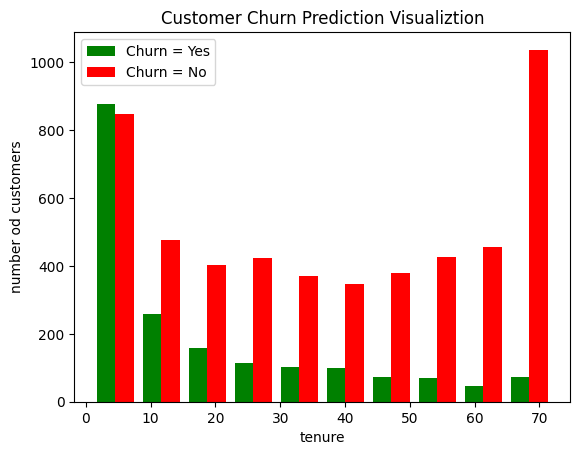

In [ ]:
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure
tenure_churn_no = df1[df1.Churn == 'No'].tenure

plt.xlabel('tenure')
plt.ylabel('number od customers')
plt.title('Customer Churn Prediction Visualiztion')

plt.hist([tenure_churn_yes,tenure_churn_no], color= ['green','red'],label=['Churn = Yes','Churn = No'])
plt.legend()


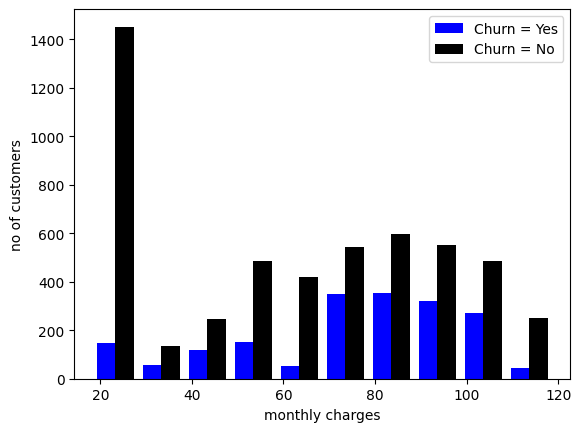

In [ ]:
mc_chrun_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
mc_chrun_no = df1[df1.Churn == 'No'].MonthlyCharges

plt.xlabel('monthly charges')
plt.ylabel('no of customers')

plt.hist([mc_chrun_yes,mc_chrun_no],color=['blue','black'],label=['Churn = Yes','Churn = No'])

plt.legend()


In [ ]:
df1.select_dtypes(include='object').apply(lambda x: x.unique())


,0
gender,"[Female, Male]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"
OnlineBackup,"[Yes, No, No internet service]"
DeviceProtection,"[No, Yes, No internet service]"
TechSupport,"[No, Yes, No internet service]"


In [ ]:
df1.select_dtypes(include='object').apply(lambda x : x.unique())

,0
gender,"[Female, Male]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"
OnlineBackup,"[Yes, No, No internet service]"
DeviceProtection,"[No, Yes, No internet service]"
TechSupport,"[No, Yes, No internet service]"


In [ ]:
df1.replace('No internet service' , 'No' , inplace = True)
df1.replace('No phone service' , 'No' , inplace = True)


<ipython-input-27-c275b08ed9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' , 'No' , inplace = True)
<ipython-input-27-c275b08ed9b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' , 'No' , inplace = True)


In [ ]:
df1.select_dtypes(include='object').apply(lambda x : x.unique())

,0
gender,"[Female, Male]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
PhoneService,"[No, Yes]"
MultipleLines,"[No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes]"
OnlineBackup,"[Yes, No]"
DeviceProtection,"[No, Yes]"
TechSupport,"[No, Yes]"


In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for column in df1[yes_no_columns]:
  df1[column].replace({'Yes' : 1 , 'No' : 0 }, inplace=True)


<ipython-input-29-bf71f939df5b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].replace({'Yes' : 1 , 'No' : 0 }, inplace=True)
<ipython-input-29-bf71f939df5b>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[column].replace({'Yes' : 1 , 'No' : 0 }, inplace=True)
<ipython-input-29-bf

In [ ]:
df1.select_dtypes(include='object').apply(lambda x : x.unique())

,0
gender,"[Female, Male]"
InternetService,"[DSL, Fiber optic, No]"
Contract,"[Month-to-month, One year, Two year]"
PaymentMethod,"[Electronic check, Mailed check, Bank transfer..."


In [ ]:
for col in df1:
  print(col,":",df1[col].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df1['gender'].replace({'Female' : 0 , 'Male':1}, inplace= True)

<ipython-input-32-340f7afc434c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female' : 0 , 'Male':1}, inplace= True)
<ipython-input-32-340f7afc434c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female' : 0 , 'Male':1}, inplace= True)
<ipython-i

In [ ]:
for col in df1:
  print(col,":",df1[col].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df2 = pd.get_dummies(data=df1,columns=['Contract','InternetService','PaymentMethod'])

In [ ]:
df2.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4906,0,0,1,1,72,1,1,1,1,0,...,False,False,True,False,True,False,True,False,False,False


In [ ]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
for col in df2:
  if df2[col].dtype == 'bool':
    df2[col].replace({True : 1 ,False :0 } , inplace= True)


<ipython-input-37-02fe001b30ae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].replace({True : 1 ,False :0 } , inplace= True)
<ipython-input-37-02fe001b30ae>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col].replace({True : 1 ,False :0 } , inplace= True)


In [ ]:
df2['Contract_One year']

,Contract_One year
0,0
1,1
2,0
3,1
4,0
...,...
7038,1
7039,1
7040,0
7041,0


In [ ]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [ ]:
df2['tenure']

,tenure
0,0.000000
1,0.464789
2,0.014085
3,0.619718
4,0.014085
...,...
7038,0.323944
7039,1.000000
7040,0.140845
7041,0.042254


In [ ]:
df2['MonthlyCharges']

,MonthlyCharges
0,0.115423
1,0.385075
2,0.354229
3,0.239303
4,0.521891
...,...
7038,0.662189
7039,0.845274
7040,0.112935
7041,0.558706


In [ ]:
df2['TotalCharges']

,TotalCharges
0,0.001275
1,0.215867
2,0.010310
3,0.210241
4,0.015330
...,...
7038,0.227521
7039,0.847461
7040,0.037809
7041,0.033210


In [ ]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=5 ,test_size=0.2)

In [ ]:
print(np.isnan(x_train).any())  # Check if there are NaNs in x_train
print(np.isnan(y_train).any())  # Check if there are NaNs in y_train


gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
MultipleLines                              False
OnlineSecurity                             False
OnlineBackup                               False
DeviceProtection                           False
TechSupport                                False
StreamingTV                                False
StreamingMovies                            False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                               False
Contract_Month-to-month                    False
Contract_One year                          False
Contract_Two year                          False
InternetService_DSL                        False
InternetService_Fibe

In [ ]:
x_train.shape

(5625, 26)

In [ ]:
y_train.shape

(5625,)

In [ ]:
model = keras.Sequential([

        keras.layers.Dense(26,input_shape = (26,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6682 - loss: 0.6041
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7805 - loss: 0.4410
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7966 - loss: 0.4228
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8116 - loss: 0.4034
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7999 - loss: 0.4143
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8082 - loss: 0.4163
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8114 - loss: 0.3957
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: 0.4116
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8061 - loss: 0.4107
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8208 - loss: 0.3898
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8046 - loss: 0.4092
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4358


[0.44271600246429443, 0.7910447716712952]

In [ ]:
yp = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
ypred = []

for i in yp:
  if i > 0.5 :
    ypred.append(1)
  else:
    ypred.append(0)

In [ ]:
ypred[:5]

[0, 1, 0, 1, 1]

In [ ]:
y_test[:5]

,Churn
2660,0
744,0
5579,1
64,1
3287,1


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



In [ ]:
import seaborn as sns

Text(58.222222222222214, 0.5, 'Truth')

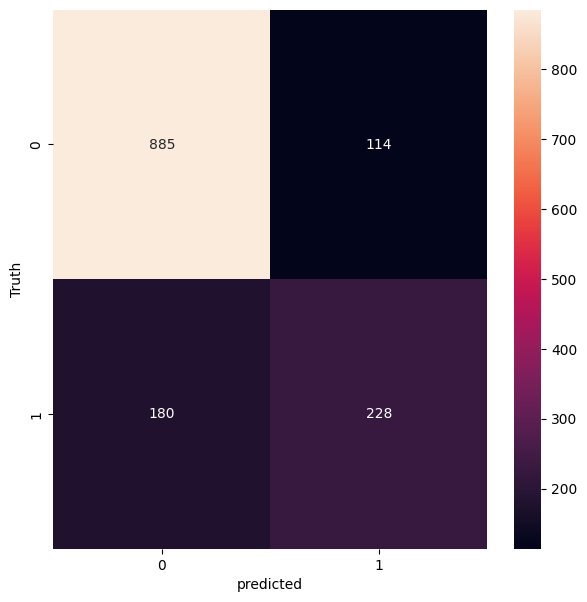

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = ypred)
plt.figure(figsize=(7,7))

sns.heatmap(cm,annot=True,fmt='d')

plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
count_class_0 , count_class_1 = df2.Churn.value_counts()
count_class_0,count_class_1

(5163, 1869)

**Under Sampling **

In [ ]:
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [ ]:
df_class_0_down = df_class_0.sample(count_class_1)

In [ ]:
df_class_0_down.shape

(1869, 27)

In [ ]:
df_under_samp = pd.concat([df_class_0_down,df_class_1],axis=0)



In [ ]:
df_under_samp.Churn.value_counts()

,count
Churn,
0,1869
1,1869


In [ ]:
x = df_under_samp.drop('Churn',axis='columns')
y = df_under_samp['Churn']

from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [ ]:
#ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Over Sampling

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_over_test = pd.concat([df_class_0,df_class_1_over],axis=0)

In [ ]:
df_over_test.Churn.value_counts()

,count
Churn,
0,5163
1,5163


In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [ ]:
X = df_over_test.drop('Churn',axis='columns')
y = df_over_test['Churn']


In [ ]:
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [ ]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
!pip install -U imbalanced-learn


In [ ]:


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()


,count
Churn,
0,5163
1,5163


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=5,stratify=y_sm)


In [ ]:
y_train.value_counts()

,count
Churn,
0,4130
1,4130


In [ ]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6388 - loss: 0.6205
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7618 - loss: 0.4894
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7761 - loss: 0.4711
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7800 - loss: 0.4589
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7812 - loss: 0.4627
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7867 - loss: 0.4477
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7881 - loss: 0.4495
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7817 - loss: 0.4539
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7943 - loss: 0.4397
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.4366
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8050 - loss: 0.4239
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [ ]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)